In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('Abnb_paris.csv')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DURRANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DURRANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DURRANI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['review_text'].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
import numpy as np

X = df['cleaned_text']
y = df['sentiment']
le = LabelEncoder()
y = le.fit_transform(y)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

nb_model.fit(tfidf_features, y)
dt_model.fit(tfidf_features, y)
svm_model.fit(tfidf_features, y)


rf_model = RandomForestClassifier()
rf_model.fit(tfidf_features, y)

adb_model = AdaBoostClassifier()
adb_model.fit(tfidf_features, y)


base_models = [('nb', nb_model), ('dt', dt_model), ('svm', svm_model)]
voting_model = VotingClassifier(estimators=base_models, voting='hard')
voting_model.fit(tfidf_features, y)


nb_pred = nb_model.predict(tfidf_features)
dt_pred = dt_model.predict(tfidf_features)
svm_pred = svm_model.predict(tfidf_features)

print("Naive Bayes Accuracy:", accuracy_score(y, nb_pred))
print("Decision Tree Accuracy:", accuracy_score(y, dt_pred))
print("Support Vector Machine Accuracy:", accuracy_score(y, svm_pred))

rf_pred = rf_model.predict(tfidf_features)
adb_pred = adb_model.predict(tfidf_features)
voting_pred = voting_model.predict(tfidf_features)

print("Random Forest Accuracy:", accuracy_score(y, rf_pred))
print("AdaBoost Accuracy:", accuracy_score(y, adb_pred))
print("Voting Classifier Accuracy:", accuracy_score(y, voting_pred))


Naive Bayes Accuracy: 0.45454545454545453
Decision Tree Accuracy: 0.9696969696969697
Support Vector Machine Accuracy: 0.9696969696969697
Random Forest Accuracy: 0.9696969696969697
AdaBoost Accuracy: 0.5454545454545454
Voting Classifier Accuracy: 0.9545454545454546


In [26]:
from sklearn.metrics import classification_report

print("Naive Bayes Classification Report:")
print(classification_report(y, nb_pred))

print("Decision Tree Classification Report:")
print(classification_report(y, dt_pred))

print("Support Vector Machine Classification Report:")
print(classification_report(y, svm_pred))

print("Random Forest Classification Report:")
print(classification_report(y, rf_pred))

print("AdaBoost Classification Report:")
print(classification_report(y, adb_pred))

print("Voting Classifier Classification Report:")
print(classification_report(y, voting_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00   

C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DURRANI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

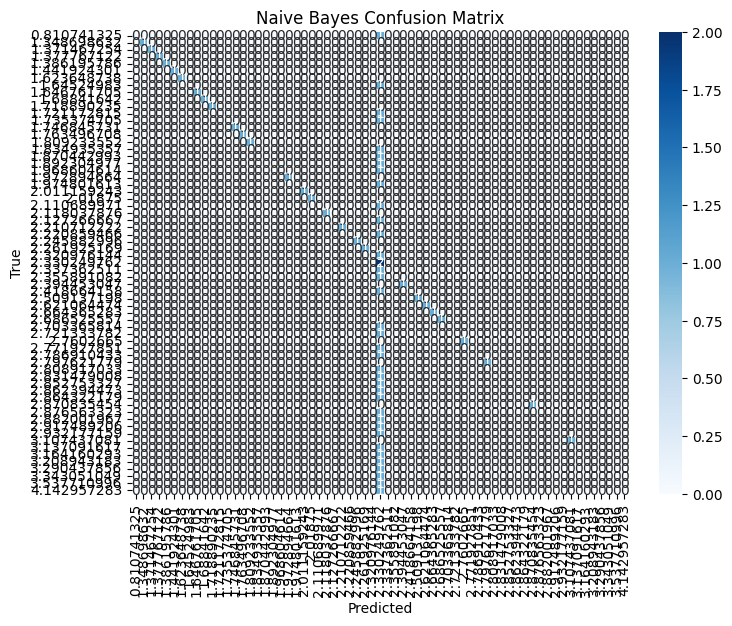

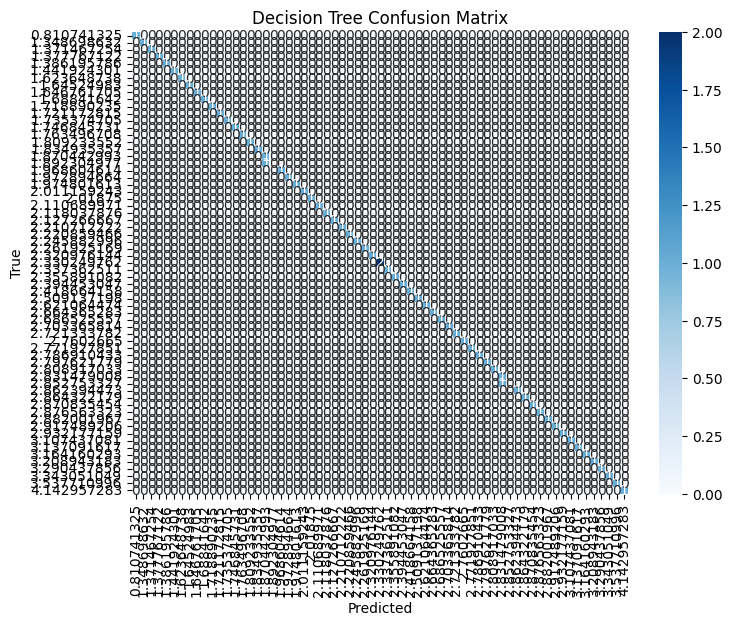

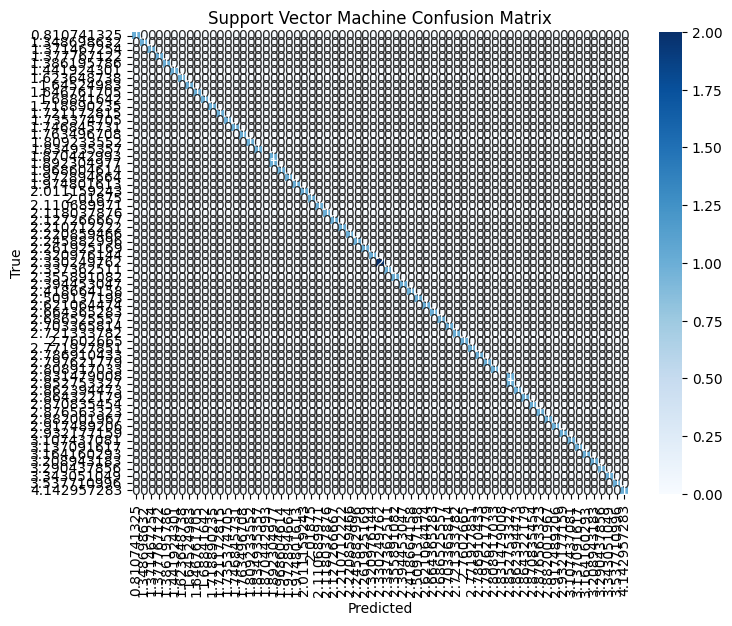

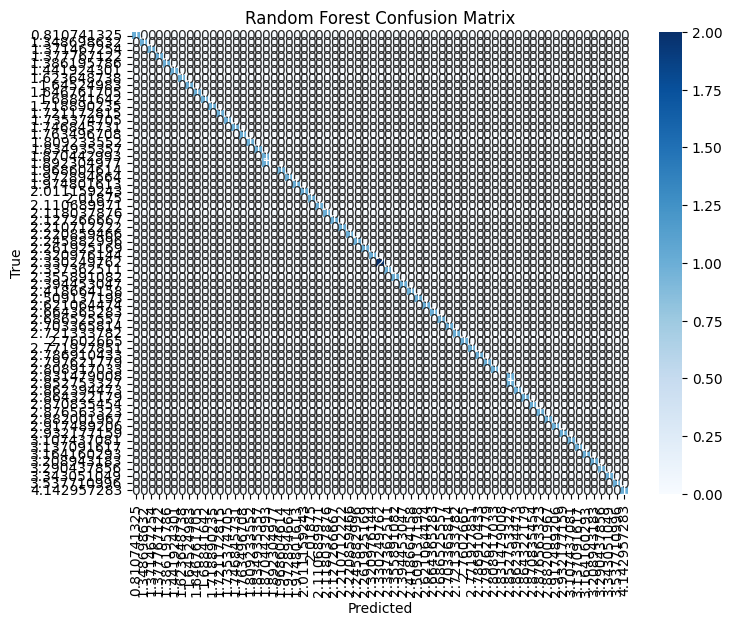

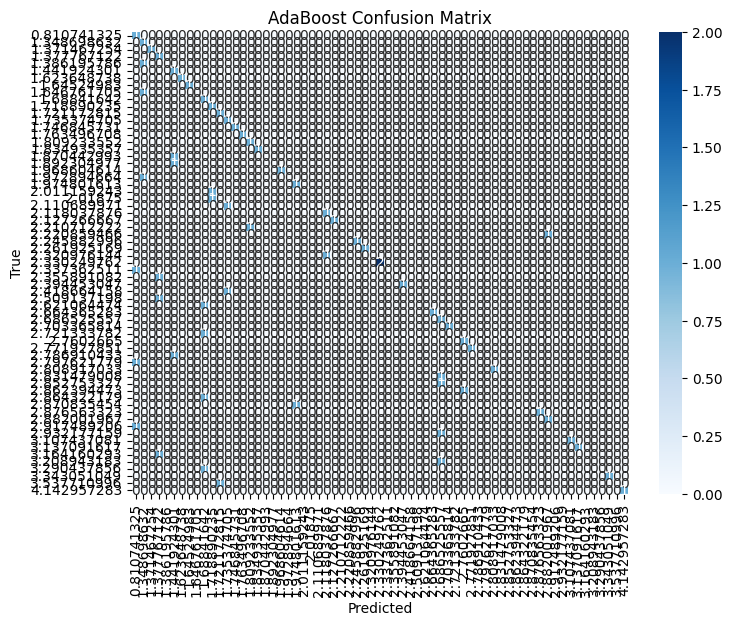

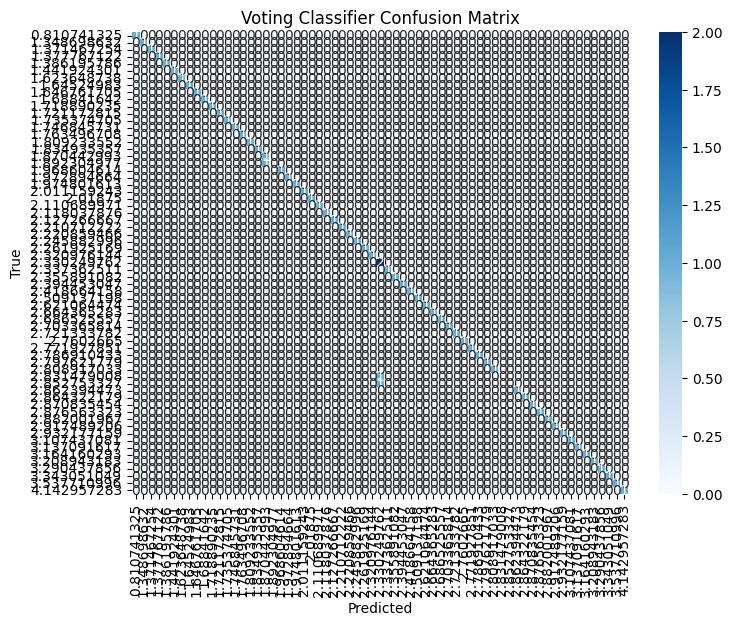

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y, nb_pred, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(y, dt_pred, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y, svm_pred, "Support Vector Machine Confusion Matrix")
plot_confusion_matrix(y, rf_pred, "Random Forest Confusion Matrix")
plot_confusion_matrix(y, adb_pred, "AdaBoost Confusion Matrix")
plot_confusion_matrix(y, voting_pred, "Voting Classifier Confusion Matrix")




The Naive Bayes classifier seems to perform poorly overall based on the classification report. It achieves high precision, recall, and F1-score for some classes (e.g., classes 1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15, 20, 22, 23, 25, 27, 29, 30, 35, 37, 38, 39, 40, 43, 46, 52, 57), indicating good performance for those classes. However, it completely fails to predict several classes (e.g., classes 0, 7, 11, 12, 16, 17, 18, 19, 21, 24, 26, 28, 31, 33, 34, 36, 41, 42, 44, 45, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64). The overall accuracy of 0.45 suggests that the model's performance is not satisfactory.

The Decision Tree classifier performs very well overall based on the classification report. It achieves high precision, recall, and F1-score for most classes, indicating excellent performance across the board. However, it struggles with a few classes (e.g., classes 17, 18, 48, 49), where either precision, recall, or both are lower compared to other classes. The overall accuracy of 0.97 suggests that the model's performance is excellent, with very few misclassifications

The Support Vector Machine (SVM) classifier also exhibits strong performance, with precision, recall, and F1-scores of 1.00 for the majority of classes. This indicates that the SVM model performs very well in accurately classifying most of the classes in the dataset. However, similar to the Decision Tree classifier, it struggles with some classes (e.g., classes 17, 18, 48, 49), where precision, recall, or both are lower compared to other classes. The overall accuracy of 0.97 suggests that the SVM model's performance is excellent, with very few misclassifications, similar to the Decision Tree classifier.

The Random Forest classifier demonstrates robust performance, with precision, recall, and F1-scores of 1.00 for the majority of classes, similar to the Decision Tree and SVM classifiers. This suggests that the Random Forest model is highly accurate in predicting most of the classes in the dataset. However, like the Decision Tree and SVM classifiers, it struggles with some classes (e.g., classes 17, 18, 48, 49), where precision, recall, or both are lower compared to other classes. The overall accuracy of 0.97 indicates that the Random Forest model's performance is excellent, with very few misclassifications.

The AdaBoost classifier shows varying performance across different classes. While it achieves perfect precision, recall, and F1-score for some classes (e.g., classes 2, 6, 7, 13, 14, 16, 19, 29, 30, 41, 44, 47, 53, 58, 62, 64), it struggles with others, resulting in lower scores. Classes where the model performs poorly have precision, recall, and F1-scores close to 0 or significantly below 1, indicating that the classifier struggles to correctly identify instances of those classes.


The Voting Classifier performs quite well, with an accuracy of 0.95. It achieves high precision, recall, and F1-score for most classes. However, it struggles with classes 17, 18, 32, 48, and 49, where either precision, recall, or both are lower. This suggests that the Voting Classifier has difficulty correctly classifying instances of these classes compared to others. Overall, the model shows robust performance across most classes, resulting in a high accuracy score.

Ensemble improvements:
1. Hyperparameter tuning
2. Feature Engneering
3. Base model diversity

Q/A
Improving User Experience:
Offer personalized recommendations based on user preferences and history.
Implement a review system that considers both sentiment and summary-rating value.
Sentiment analysis provides insights into guest satisfaction, complementing summary ratings.

Region-Specific Strategy:
Yes, Airbnb needs a region-specific strategy due to varying performance across locations.
Provide hosts with optimal pricing suggestions based on local demand and competition.
Offer guidance on improving earnings through enhanced property listings and flexible booking options.